## Tensorflow Exploration 

### Importing + splitting data

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#sample dataset: https://keras.io/api/datasets/fashion_mnist/
data = keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [33]:
(X_train, y_train), (X_test, y_test) = data.load_data()
X_train = X_train/250; X_test = X_train/250 #compress images

### Exploring data

In [34]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [35]:
#images are 28x28 with each grayscale value represented by image[i][j]
np.shape(X_train), np.shape(y_train)

((60000, 28, 28), (60000,))

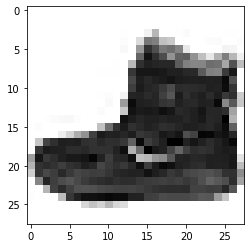

In [36]:
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()

### Model training + evaluation

In [37]:
#softmax -> makes sure output layer is a probability
#epoch -> how many times the network iterates through the dataset
#Keras.sequential -> layers definition
#cross-entropy is used when true labels are one-hot encoded

model = keras.Sequential([
    keras.layers.Flatten(input_shape=np.shape(X_train[0])),
    keras.layers.Dense(128,activation="relu"), #tot pixels
    keras.layers.Dense(10,activation="softmax") #tot outcomes
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [38]:
model.fit(X_train, y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4955 - accuracy: 0.8256
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3722 - accuracy: 0.8674
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3355 - accuracy: 0.8772
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3120 - accuracy: 0.8864


In [44]:
lost, acc = model.evaluate(X_test[-10000:], y_test)
print(f'Accuracy: {acc}') #most likely due to data being mixed up

313/313 [==============================] - 1s 2ms/step - loss: 3.3715 - accuracy: 0.1000
Accuracy: 0.10000000149011612


In [47]:
model.predict(X_test)[0]

1875/1875 [==============================] - 3s 2ms/step


array([0.07625948, 0.00595636, 0.04536819, 0.04542431, 0.01308424,
       0.69784695, 0.06035765, 0.03487037, 0.01782346, 0.00300902],
      dtype=float32)